In [1]:
try:
    import modAL
except:
    !pip install modAL

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 11.5 MB 37.6 MB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.1
    Uninstalling pandas-1.0.1:
      Successfully uninstalled pandas-1.0.1
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd

from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

In [68]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(5000, 20, 4, n_classes=5)
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [69]:
n_initial = 500
initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)

In [51]:
learner = ActiveLearner(
    estimator = RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

In [52]:
accuracy_scores = [learner.score(X_test, y_test)]
print(accuracy_scores)

[0.66]


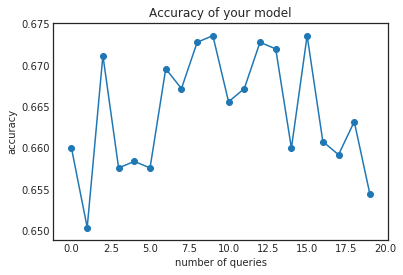

what is the class? HINT it is [0]


 0


In [53]:
n_queries = 20

for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    
    with plt.style.context('seaborn-white'):
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        
    print(f"what is the class? HINT it is {y_pool[query_idx]}")
    y_new = np.array([int(input())], dtype=int)
    learner.teach(query_inst.reshape(1,-1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))

In [26]:
qry_idx, qry_inst = learner.query(X)

In [27]:
print(f'features: {qry_inst}, target: {y[qry_idx]}')

features: [[6.  2.7 5.1 1.6]], target: [1]


In [25]:
learner.teach(X[qry_idx], y[qry_idx])

## Pool based sampling

In [10]:
# Set our RNG seed for reproducibility.
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()
X_raw = iris['data']
y_raw = iris['target']

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, random_state=RANDOM_STATE_SEED)

transformed_iris = pca.fit_transform(X=X_raw)

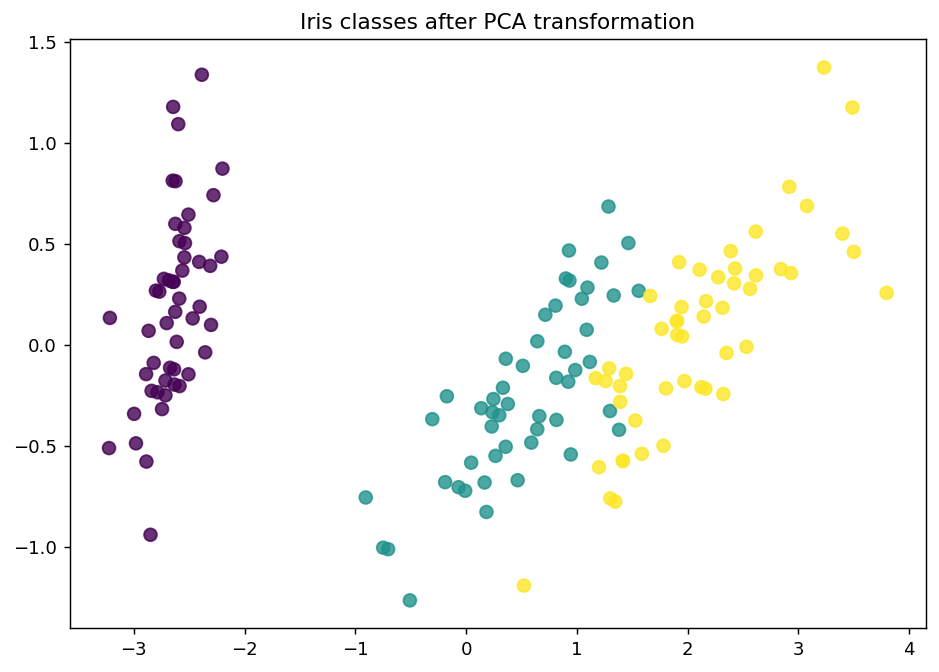

In [13]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Isolate the data we'll need for plotting.
x_component, y_component = transformed_iris[:, 0], transformed_iris[:, 1]

# Plot our dimensionality-reduced (via PCA) dataset.
plt.figure(figsize=(8.5, 6), dpi=130)
plt.scatter(x=x_component, y=y_component, c=y_raw, cmap='viridis', s=50, alpha=8/10)
plt.title('Iris classes after PCA transformation')
plt.show()



In [21]:
# Isolate our examples for our labeled dataset.
n_labeled_examples = X_raw.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_train = X_raw[training_indices]
y_train = y_raw[training_indices]

# Isolate the non-training examples we'll be querying.
X_pool = np.delete(X_raw, training_indices, axis=0)
y_pool = np.delete(y_raw, training_indices, axis=0)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


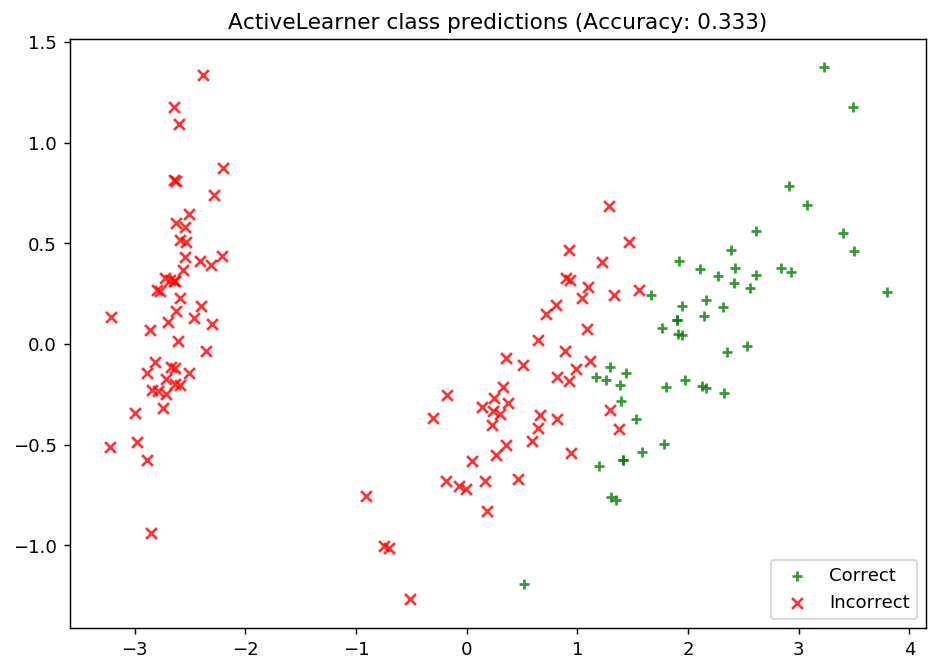

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from modAL.models import ActiveLearner

# Specify our core estimator along with it's active learning model.
knn = KNeighborsClassifier(n_neighbors=3)
learner = ActiveLearner(estimator=knn, X_training=X_train, y_training=y_train)


predictions = learner.predict(X_raw)
is_correct = (predictions == y_raw)

print(predictions)
# Record our learner's score on the raw data.
unqueried_score = learner.score(X_raw, y_raw)

# Plot our classification results.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)
ax.scatter(x=x_component[is_correct],  y=y_component[is_correct],  c='g', marker='+', label='Correct',   alpha=8/10)
ax.scatter(x=x_component[~is_correct], y=y_component[~is_correct], c='r', marker='x', label='Incorrect', alpha=8/10)
ax.legend(loc='lower right')
ax.set_title("ActiveLearner class predictions (Accuracy: {score:.3f})".format(score=unqueried_score))
plt.show()

In [109]:
N_QUERIES = 20
performance_history = [unqueried_score]
print(f'Initial accuracy: {unqueried_score:.4f}')

print(performance_history)
for index in range(N_QUERIES):
    query_idx, query_inst = learner.query(X_pool) 
    X,y = X_pool[query_idx].reshape(1,-1), y_pool[query_idx].reshape(1,)
    learner.teach(X,y)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx)
    accuracy = learner.score(X_raw, y_raw)
    print(f'Accuracy after query {index}: {accuracy:.4f}')
    performance_history.append(accuracy)

Accuracy after query 0: 0.6667
Accuracy after query 1: 0.6667
Accuracy after query 2: 0.8800
Accuracy after query 3: 0.8800
Accuracy after query 4: 0.8733
Accuracy after query 5: 0.8400
Accuracy after query 6: 0.7400
Accuracy after query 7: 0.7267
Accuracy after query 8: 0.7267
Accuracy after query 9: 0.7267
Accuracy after query 10: 0.7267
Accuracy after query 11: 0.7267
Accuracy after query 12: 0.7267
Accuracy after query 13: 0.7267
Accuracy after query 14: 0.7200
Accuracy after query 15: 0.8400
Accuracy after query 16: 0.8800
Accuracy after query 17: 0.8933
Accuracy after query 18: 0.9267
Accuracy after query 19: 0.9267


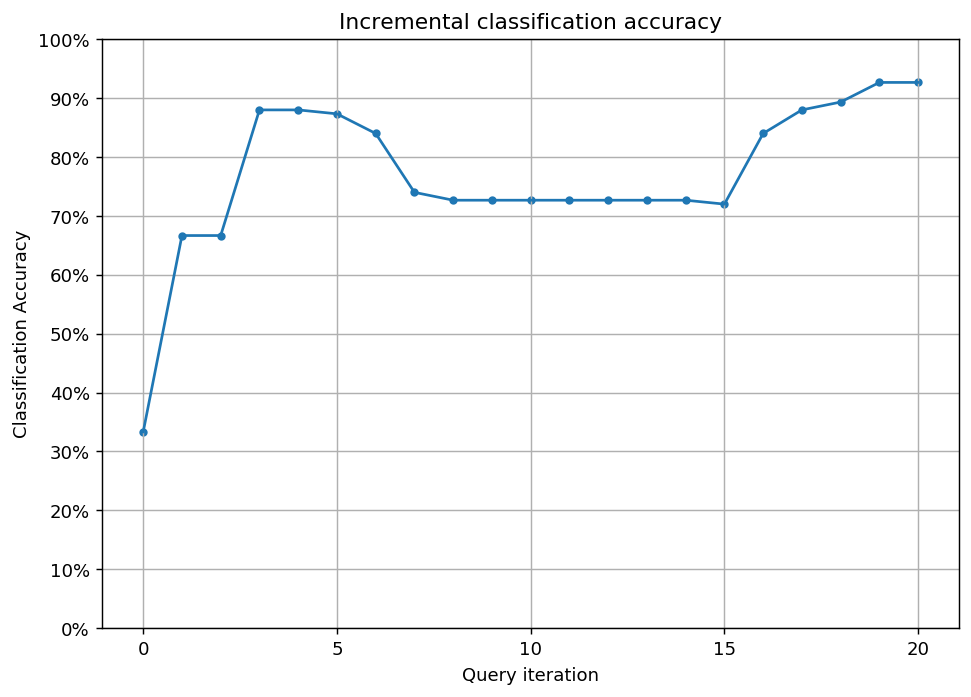

In [111]:
# Plot our performance over time.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history)
ax.scatter(range(len(performance_history)), performance_history, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

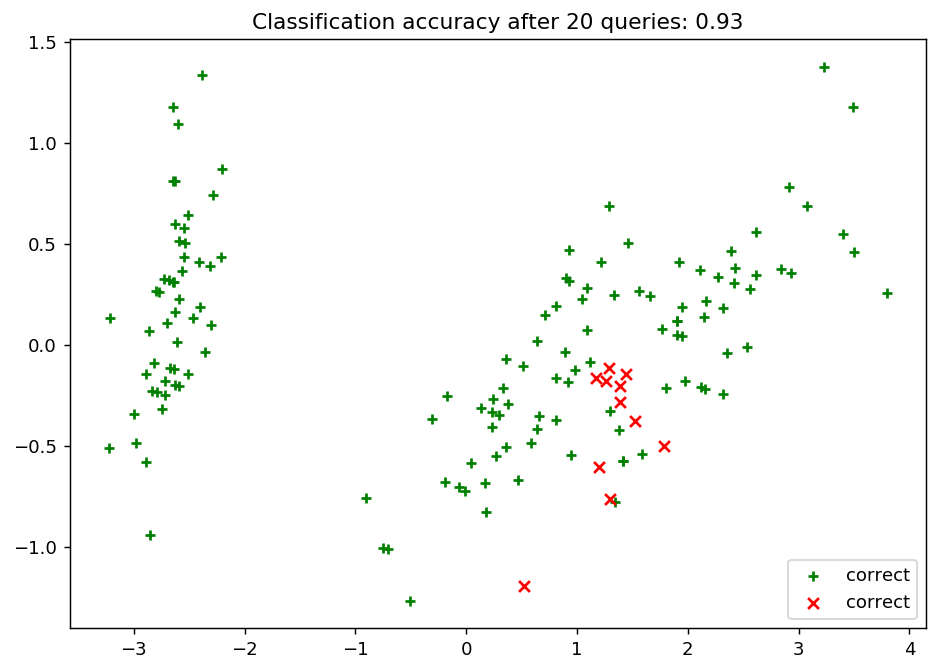

In [114]:
preds = learner.predict(X_raw)
is_correct = (preds == y_raw)

fix, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.scatter(x=x_component[is_correct], y=y_component[is_correct], c='g', marker='+', label='correct')
ax.scatter(x=x_component[~is_correct], y=y_component[~is_correct], c='r', marker='x', label='correct')

ax.set_title(f'Classification accuracy after {N_QUERIES} queries: {performance_history[-1]:.2f}')
ax.legend(loc='lower right')

plt.show()

## Batch Mode

In [14]:
from modAL.batch import uncertainty_batch_sampling
from functools import partial

BATCH_SIZE = 100
preset_batch = partial(uncertainty_batch_sampling, n_instances=BATCH_SIZE)

In [18]:
X_train.shape

(3750, 20)

In [19]:
y_train.shape

(3750,)

In [20]:
print(X_raw.shape, y_raw.shape)

(150, 4) (150,)


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


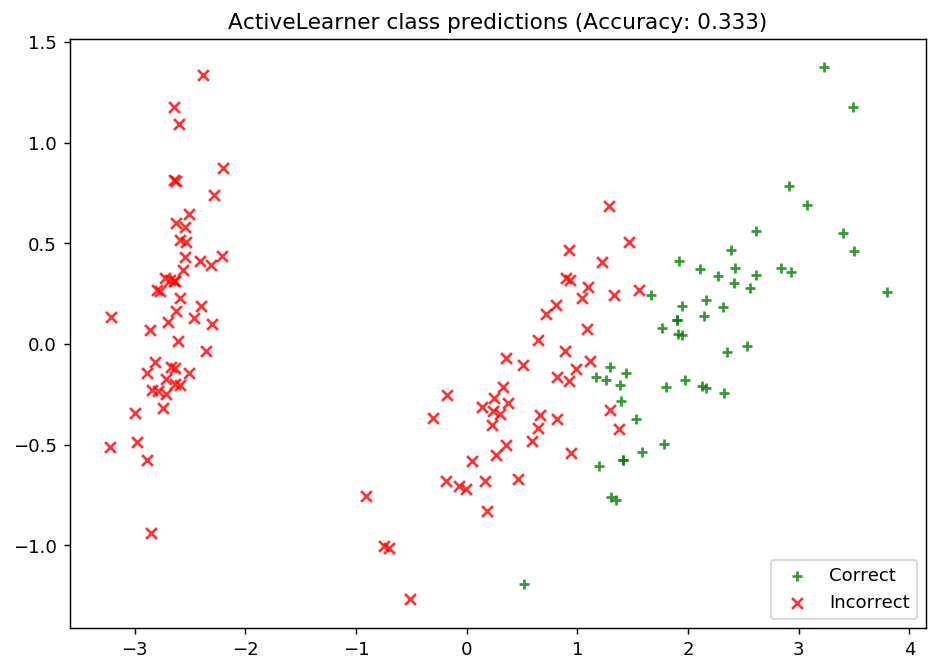

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from modAL.models import ActiveLearner

# Specify our core estimator along with it's active learning model.
knn = KNeighborsClassifier(n_neighbors=3)
learner = ActiveLearner(estimator=knn, X_training=X_train, y_training=y_train, query_strategy=preset_batch)


predictions = learner.predict(X_raw)
is_correct = (predictions == y_raw)

print(predictions)
# Record our learner's score on the raw data.
unqueried_score = learner.score(X_raw, y_raw)

# Plot our classification results.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)
ax.scatter(x=x_component[is_correct],  y=y_component[is_correct],  c='g', marker='+', label='Correct',   alpha=8/10)
ax.scatter(x=x_component[~is_correct], y=y_component[~is_correct], c='r', marker='x', label='Incorrect', alpha=8/10)
ax.legend(loc='lower right')
ax.set_title("ActiveLearner class predictions (Accuracy: {score:.3f})".format(score=unqueried_score))
plt.show()

BATCH_SIZE=3
N_RAW_SAMPLES = 20
N_QUERIES = N_RAW_SAMPLES // BATCH_SIZE

performance_history = [unqueried_score]

In [29]:
for index in range(N_QUERIES):
    
    query_idx, query_inst = learner.query(X_pool)
    print(query_idx)
    X,y = X_pool[query_idx], y_pool[query_idx]
    learner.teach(X=X, y=y)
    
    X_pool = np.delete(X_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx)
    
    acc = learner.score(X_raw, y_raw)
    print(f'accuracy after query {index}: {acc:.4f}')
    performance_history.append(acc)

[ 22  97  15 116  41 107  62  20 133  50 128  64 105 106 138 112  45 131
  73  67  60 134 132  32  24 140  13  80  84  76 126  66  43  14  59 117
 104  72 111  18  37 129  44  89 146 110  16  87  53  71  70 109  75  99
  36 108  51 101   6 115  77  57  54 143 113  82  19  69  35   8  65 123
  33 137  78 119   5  28  61 130  42  29  85 122  25  55  10 103  31  81
  23  56 100 127  40   2  52  68  86  93]
accuracy after query 0: 0.9667
[38 21 37 40 36 33 43 46 20 44  6 19 45 35  5 24 31 10 25 32  2  7 41 29
 12 22 28  1  9 14 15 16  0  3 17 26 27 34 11 23 30 39  8 13 18  4 42]
accuracy after query 1: 0.9600


ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required.

In [27]:
N_QUERIES

0

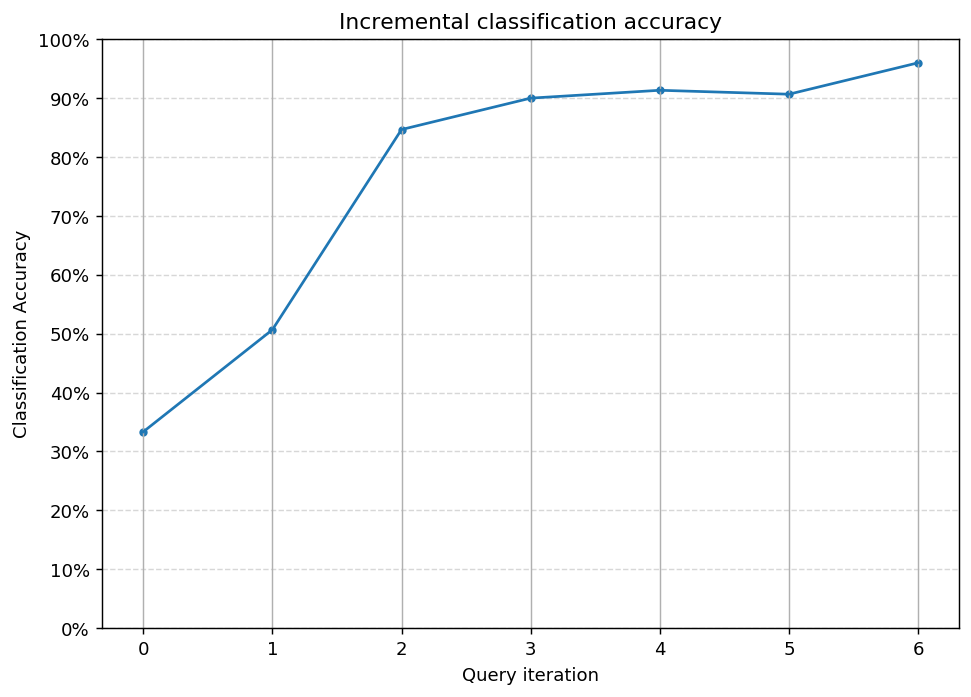

In [156]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Plot our performance over time.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history)
ax.scatter(range(len(performance_history)), performance_history, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=N_QUERIES + 3, integer=True))
ax.xaxis.grid(True)

ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))
ax.set_ylim(bottom=0, top=1)
ax.yaxis.grid(True, linestyle='--', alpha=1/2)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()



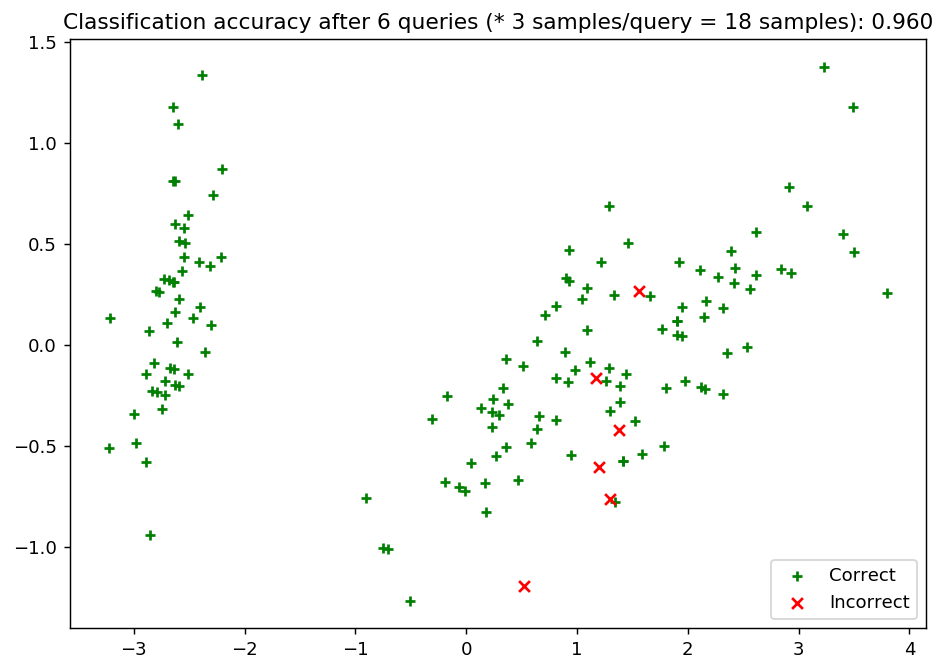

In [157]:
# Isolate the data we'll need for plotting.
predictions = learner.predict(X_raw)
is_correct = (predictions == y_raw)

# Plot our updated classification results once we've trained our learner.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.scatter(x=x_component[is_correct],  y=y_component[is_correct],  c='g', marker='+', label='Correct')
ax.scatter(x=x_component[~is_correct], y=y_component[~is_correct], c='r', marker='x', label='Incorrect')

ax.set_title('Classification accuracy after {n} queries (* {batch_size} samples/query = {total} samples): {final_acc:.3f}'.format(
    n=N_QUERIES,
    batch_size=BATCH_SIZE,
    total=N_QUERIES * BATCH_SIZE,
    final_acc=performance_history[-1]
))
ax.legend(loc='lower right')

plt.show()

## Batch Score Classification With Stakeholder In The Loop

There are two main active learning styles: streaming and batch. 
In the case where we have to go back to the stakeholder for 
Batch scoring is a particularly suitable method for our use cases due to the time taken for us to get stake

In [4]:
import numpy as np

In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pickle

def eval(learner, X, y):
    preds = learner.predict(X)
    is_correct = (preds == y)
    return np.mean(is_correct)

X, y = make_classification(5000, 20, 12, n_classes=5)
X_train, X_test, y_train, y_test = train_test_split(X, y)
n_initial = 500
initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)

### 1. Create initial model

In [229]:
from functools import partial
from modAL.batch import uncertainty_batch_sampling
from modAL.models import ActiveLearner
from sklearn.model_selection import RandomizedSearchCV


# Specify how many labels you want stakeholder to examine
BATCH_SIZE = 100
preset_batch = partial(uncertainty_batch_sampling, n_instances=BATCH_SIZE)

params = {
     'bootstrap': [True, False],
     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
     'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

# Do initial training
rf = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=params, n_iter=10, cv=2, verbose=2, n_jobs=-1)
learner = ActiveLearner(
    estimator = rf,
    query_strategy=preset_batch,
    X_training=X_initial, y_training=y_initial
)
# Evaluate
print(f"Initial training resulted in accuracy of {eval(learner, X, y)}")
# Save the model
pickle.dump(learner.estimator, open("../models/initial_model.pkl", "wb"))

Initial training resulted in accuracy of 0.7188


### 2. Query model for uncertain data

In [230]:
# Extract some unlabeled data from the database that is > BATCH_SIZE, could be all the data, and you keep removing and refining
N_RAW_SAMPLES = 500

iter_one_idx = np.random.choice(range(len(X_pool)), size=N_RAW_SAMPLES, replace=False)
X_fromdb, y_fromdb = X_pool[iter_one_idx], y_pool[iter_one_idx]


X_pool = np.delete(X_pool, iter_one_idx, axis=0)
y_pool = np.delete(y_pool, iter_one_idx)

query_index, query_inst = learner.query(X_fromdb)

### 2. Save Uncertain data and send to stakeholder

In [231]:
# Save most uncertain predictions to csv and send that to stakeholder to label
unlabelled = pd.DataFrame(query_inst, index=query_index)
unlabelled['label'] = None
unlabelled.to_csv('../data/01_unlabelled_data.csv')

<br>
Weeks go by as you wait for the client...
<br>
<br>
Scope changes, bla bla bla
<br>
<br>

Woop client labels Data!

In [232]:
labelled = unlabelled.copy()
labelled['label'] = y_fromdb[query_index]
labelled.to_csv('../data/01_labelled_data.csv')
del labelled

### 3. Stakeholder Returns labelled dataset

In [233]:
# load in labels, original model and load learner
labelled = pd.read_csv('../data/01_labelled_data.csv', index_col=0)
X_from_sh = labelled.drop('label', axis=1).to_numpy()
y_from_sh = labelled.label.to_numpy()

rf_initial = pickle.load(open('../models/initial_model.pkl', 'rb'))
learner_pretrained = ActiveLearner(
    estimator = rf_initial,
    query_strategy=preset_batch
)

In [234]:
learner.teach(X_from_sh, y_from_sh)
print(f"Retraining resulted in accuracy of {eval(learner, X, y)}")

Retraining resulted in accuracy of 0.751


Awseome! We have seen a nice bump in accuracy, but hopefully we've also seen an improvement in generalisabiliy...

### 4.1 Rinse and Repeat

In [226]:
# Extract some unlabeled data from the database that is > BATCH_SIZE, could be all the data, and you keep removing and refining
N_RAW_SAMPLES = 500

iter_two_idx = np.random.choice(range(len(X_pool)), size=N_RAW_SAMPLES, replace=False)
X_fromdb, y_fromdb = X_pool[iter_two_idx], y_pool[iter_two_idx]


X_pool = np.delete(X_pool, iter_two_idx, axis=0)
y_pool = np.delete(y_pool, iter_two_idx)

query_index, query_inst = learner_pretrained.query(X_fromdb)

.  
<br>
.    
.    
.    
.  
.  
.  

In [227]:
learner.teach(X_fromdb[query_index], y_fromdb[query_index])
print(f"Retraining resulted in accuracy of {eval(learner, X, y)}")

Retraining resulted in accuracy of 0.772


## All Wrapped UP

In [7]:
get_data()

(array([[ 8.23941669e-01, -4.77226566e-01,  4.60832613e+00,
          4.47500542e+00, -6.26348030e-01,  2.13213274e+00,
          1.44905202e+00, -5.37520794e-01,  2.02500124e+00,
         -3.36350903e+00, -3.11872393e+00,  1.35126461e+00,
          2.15302335e+00, -9.47493113e-01, -4.32035630e+00,
         -3.23853511e+00,  1.11745055e+00,  1.59775525e+00,
          2.13389014e+00, -1.72493931e+00],
        [-2.18754180e+00, -2.22049180e+00,  3.26052917e+00,
         -3.31587675e+00,  4.54185353e-03,  3.94811360e-01,
         -5.64011060e-01, -8.92149597e-01,  3.71552047e-01,
          8.89750273e-01,  9.35049712e-01,  5.77905995e-02,
          4.64793654e+00,  8.29519149e-01,  4.55777721e+00,
         -1.05850356e+00, -2.13238733e+00, -2.08803376e+00,
          5.89364016e-01,  4.16513327e-01],
        [-2.45090270e-01, -6.06967382e-01,  9.20720766e-02,
         -8.05277650e-01, -1.00054882e+00,  1.97432724e-01,
         -3.29715617e-01, -1.07755739e+00, -4.69990571e-02,
          1.

In [ ]:
# original train + test set
global X, y

global X_pool

def get_data():
    global X, y
    X_d = X[1:10]
    y_d = y[1:10]
    return X_d, y_d

def get_x_pool(X, labelled_indices):
    """Returns the X data which hasn't been labelled. Useful when 
    stakeholder comes back to you, you query the database and remove any labelled data"""
    return X[~labelled_indices]

def setup_learner(batch_size):
    preset_batch = partial(uncertainty_batch_sampling, n_instances=batch_size)
    params = {
         'bootstrap': [True, False],
         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10],
         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    }

    # Do initial training
    rf = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=params, n_iter=10, cv=2, verbose=2, n_jobs=-1)
    learner = ActiveLearner(
        estimator = rf,
        query_strategy=preset_batch
    )
    return learner

def get_uncertain_exampls(learner, X_pool):
    """Uses the learner to return examples """
    # Extract some unlabeled data from the database that is > _SIZE, could be all the data, and you keep removing and refining
    N_RAW_SAMPLES = 500

    iter_one_idx = np.random.choice(range(len(X_pool)), size=N_RAW_SAMPLES, replace=False)
    X_fromdb = X_pool[iter_one_idx]
    
    query_index, query_inst = learner.query(X_fromdb)
    return query_index, query_inst


def train(X_train, y_train, learner = None):
    
    # Specify how many labels you want stakeholder to examine
    BATCH_SIZE = 100
    
    if learner is None:
        learner = setup_learner(BATCH_SIZE)
        learner.teach(X_train, y_train)
    
    # Evaluate
    print(f"Initial training resulted in accuracy of {eval(learner, X, y)}")
    # Save the model
    pickle.dump(learner.estimator, open("../models/initial_model.pkl", "wb"))
    
    X = get_uncertain_labels()


## Batch Training News20 Dataset

In [160]:
from sklearn.datasets import fetch_20newsgroups

In [163]:
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

KeyboardInterrupt: encoding with 'zlib_codec' codec failed (KeyboardInterrupt: )

In [ ]:
twenty_test = fetch_20newsgroups(subset='test',
    categories=categories, shuffle=True, random_state=42)
docs_test = twenty_test.data

In [162]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

text_clf.fit(twenty_train.data, twenty_train.target)
preds = text_clf.predict(docs_test)
print(np.mean(preds == twenty_test.target))

In [ ]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, predicted, target_names=twenty_test.target_names))
metrics.confusion_matrix(twenty_test.target, predicted)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__alpha': (1e-2, 1e-3),
}

gs_clf = GridSearchCV(text_clf, parameters, cv=2, n_jobs=-1)